In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

## Loading the data

In [6]:
train = pd.read_csv('../data/train.gz', index_col="index")
test = pd.read_csv('../data/test.gz', index_col="index")

## Initial visual inspection of format and datatypes

In [13]:
display(train.head())
display(test.head())

,chassisType,color,driveWheels,engineVolume,fuelType,manufacturer,mileage,model,modelYear,asking_price,power
index,,,,,,,,,,,
0,hatchback,white,fwd,1.6,diesel,audi,56600.0,a1,2011,115937.0,105.0
1,hatchback,black,fwd,1.6,diesel,audi,29400.0,a1,2012,160837.0,105.0
2,hatchback,red,fwd,1.4,gasoline,audi,21300.0,a1,2014,229886.0,140.0
3,hatchback,grey,fwd,1.4,gasoline,audi,79695.0,a1,2011,130500.0,122.0
4,hatchback,grey,fwd,1.2,gasoline,audi,52500.0,a1,2012,143937.0,86.0


,chassisType,color,driveWheels,engineVolume,fuelType,manufacturer,mileage,model,modelYear,asking_price,power
index,,,,,,,,,,,
0,hatchback,white,fwd,1.6,diesel,audi,61755.0,a1,2011,148500.0,105.0
1,hatchback,blue,fwd,1.6,diesel,audi,133300.0,a1,2011,102500.0,105.0
2,hatchback,white,fwd,1.6,diesel,audi,60500.0,a1,2011,150876.0,105.0
3,hatchback,white,fwd,1.4,gasoline,audi,36100.0,a1,2013,168500.0,122.0
4,hatchback,white,fwd,1.2,gasoline,audi,52033.0,a1,2011,130886.0,86.0


In [14]:
print("Shape of training data: ", train.shape)
print("Shape of testing data: ", test.shape)

Shape of training data:  (33590, 11)
Shape of testing data:  (1367, 11)


In [17]:
print("Datatypes of training data: ")
print(train.dtypes)
print("Datatypes of testing data: ")
print(test.dtypes)

Datatypes of training data: 
chassisType      object
color            object
driveWheels      object
engineVolume    float64
fuelType         object
manufacturer     object
mileage         float64
model            object
modelYear         int64
asking_price    float64
power           float64
dtype: object
Datatypes of testing data: 
chassisType      object
color            object
driveWheels      object
engineVolume    float64
fuelType         object
manufacturer     object
mileage         float64
model            object
modelYear         int64
asking_price    float64
power           float64
dtype: object


## Checking for missing values

In [ ]:
train.isna().sum()

chassisType     303
color             0
driveWheels       0
engineVolume    182
fuelType          0
manufacturer      0
mileage           0
model             0
modelYear         0
asking_price      0
power           495
dtype: int64

In [20]:
test.isna().sum()

chassisType     0
color           0
driveWheels     0
engineVolume    0
fuelType        0
manufacturer    0
mileage         0
model           0
modelYear       0
asking_price    0
power           0
dtype: int64

## Dropping the missing values 
The training set has missing values in a few of the columns. But it was a relatively low share of the data, so we'll just drop the rows with missing values for similicity. Other strategies could have been considered with more time.

The testing set has no missing values, so we'll keep it as is.

In [21]:
train = train.dropna()

train.isna().sum()

chassisType     0
color           0
driveWheels     0
engineVolume    0
fuelType        0
manufacturer    0
mileage         0
model           0
modelYear       0
asking_price    0
power           0
dtype: int64

In [22]:
train.shape

(32679, 11)

In [23]:
train.dtypes

chassisType      object
color            object
driveWheels      object
engineVolume    float64
fuelType         object
manufacturer     object
mileage         float64
model            object
modelYear         int64
asking_price    float64
power           float64
dtype: object

## Quick pairplot analysis of the numerical variables

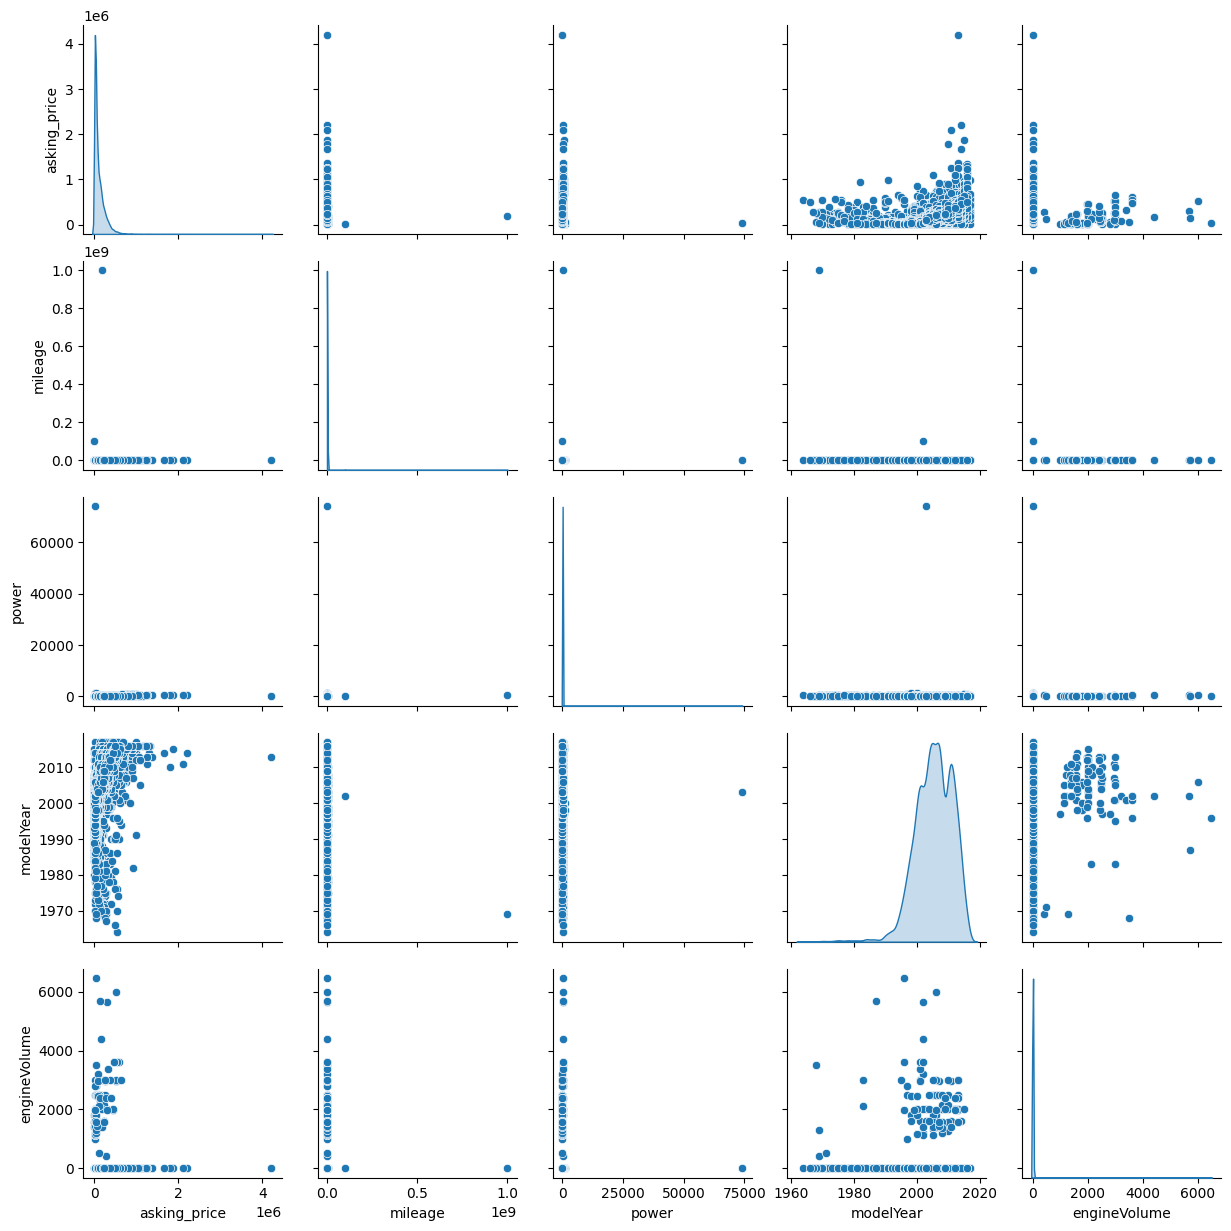

In [24]:
sns.pairplot(train[['asking_price', 'mileage', 'power', 'modelYear','engineVolume']], diag_kind='kde')


There seem to be some outliers in mileage, power and engine volume. Removing the some values based on high quantiles.

In [30]:
upper_quantile = 0.9995
lower_quantile = 0.0005

numeric_cols = train.select_dtypes(include=["number"])
quantiles = numeric_cols.quantile([lower_quantile, upper_quantile])

filtered_df = numeric_cols[
    (numeric_cols >= quantiles.loc[lower_quantile]).all(axis=1) &
    (numeric_cols <= quantiles.loc[upper_quantile]).all(axis=1)
]

filtered_df.shape


(32585, 5)

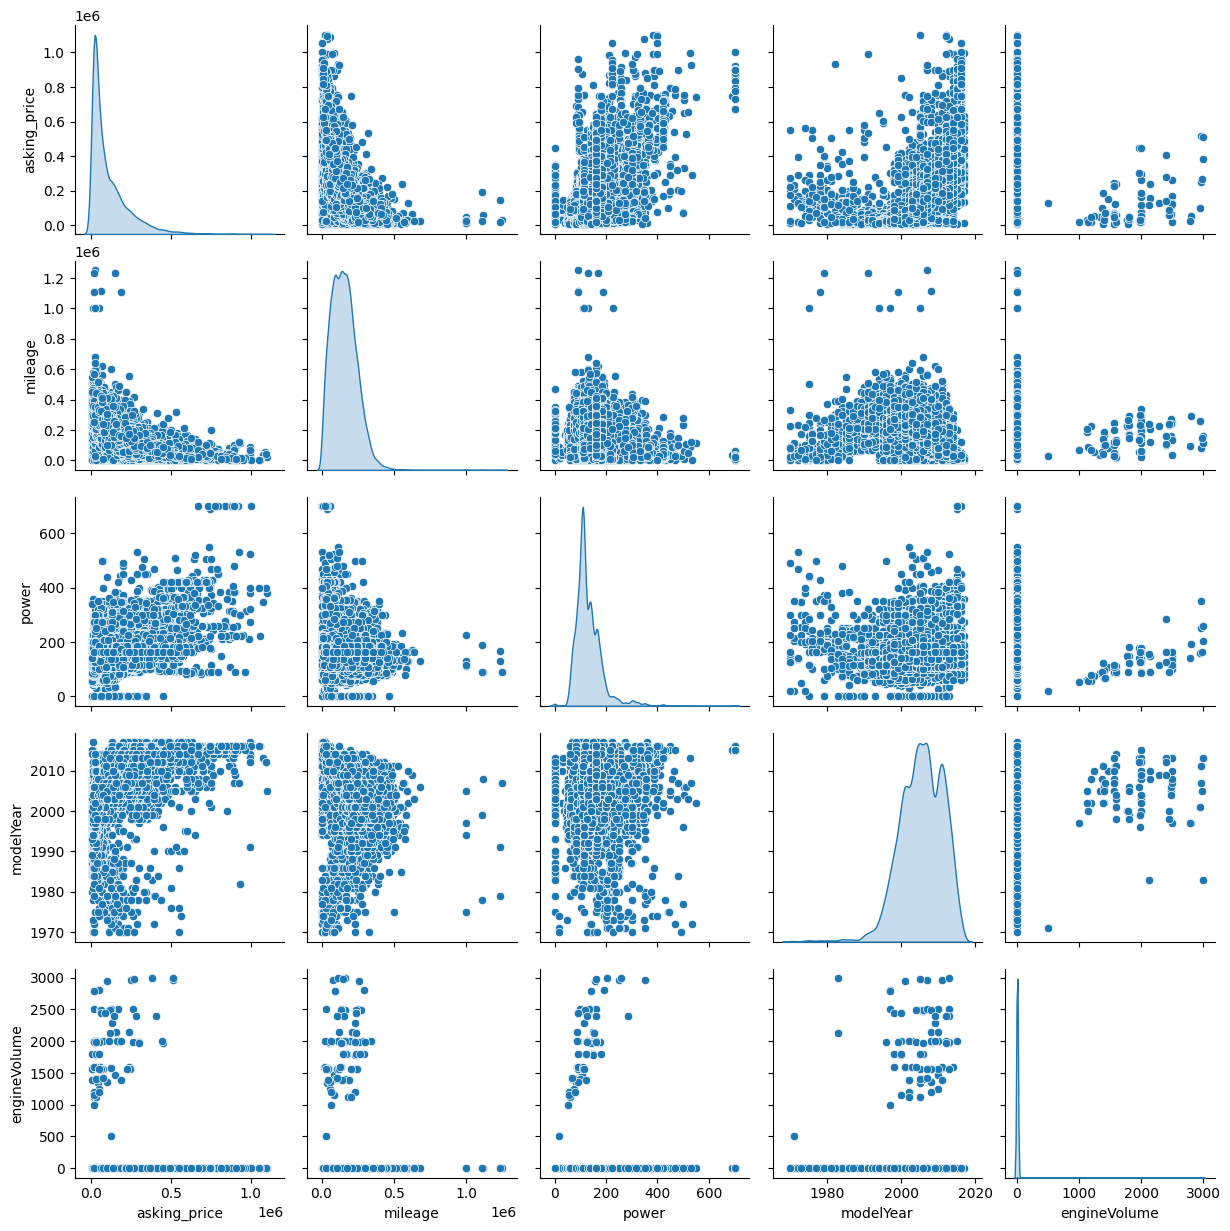

In [31]:
sns.pairplot(filtered_df[['asking_price', 'mileage', 'power', 'modelYear','engineVolume']], diag_kind='kde')


## Checking cardinality of the categorical variables


In [32]:
train.dtypes

chassisType      object
color            object
driveWheels      object
engineVolume    float64
fuelType         object
manufacturer     object
mileage         float64
model            object
modelYear         int64
asking_price    float64
power           float64
dtype: object

In [33]:
train['chassisType'].value_counts()

chassisType
hatchback       8751
stationwagon    7520
suv             5554
sedan           3451
van             2491
mpv             1781
pickup          1676
coupe            858
convertible      597
Name: count, dtype: int64

In [34]:
train['color'].value_counts()

color
black        7969
silver       5647
grey         5346
blue         4174
white        3092
red          3037
green        1748
brown         559
beige         513
yellow        168
gold          142
orange        125
lilac          70
bronze         58
turquoise      30
pink            1
Name: count, dtype: int64

In [35]:
train['driveWheels'].value_counts()

driveWheels
fwd    18539
4wd    10941
rwd     3199
Name: count, dtype: int64

In [36]:
train['fuelType'].value_counts()

fuelType
diesel         17661
gasoline       13962
electricity      713
hybrid           343
Name: count, dtype: int64

In [38]:
print(train['manufacturer'].nunique())
train['manufacturer'].value_counts()

33


manufacturer
volkswagen       2968
volvo            2590
toyota           2428
nissan           2077
peugeot          2054
audi             1900
ford             1874
mercedes-benz    1824
opel             1499
bmw              1483
mitsubishi       1327
suzuki           1148
mazda            1123
renault           944
citroen           768
honda             757
subaru            755
hyundai           752
chevrolet         696
skoda             574
saab              383
jeep              380
land rover        379
kia               375
isuzu             198
fiat              194
ssangyong         190
mini              188
porsche           180
chrysler          179
dodge             171
tesla             167
iveco             154
Name: count, dtype: int64

In [41]:
print(train['model'].nunique())
train['model'].value_counts()

175


model
dmax         198
primera      197
a4           197
xl7          195
corsa        195
            ... 
patrol       165
silverado    162
sprinter     155
daily        154
240          128
Name: count, Length: 175, dtype: int64

## Quick analysis of target variable and categorical variables

In [42]:
train.dtypes

chassisType      object
color            object
driveWheels      object
engineVolume    float64
fuelType         object
manufacturer     object
mileage         float64
model            object
modelYear         int64
asking_price    float64
power           float64
dtype: object

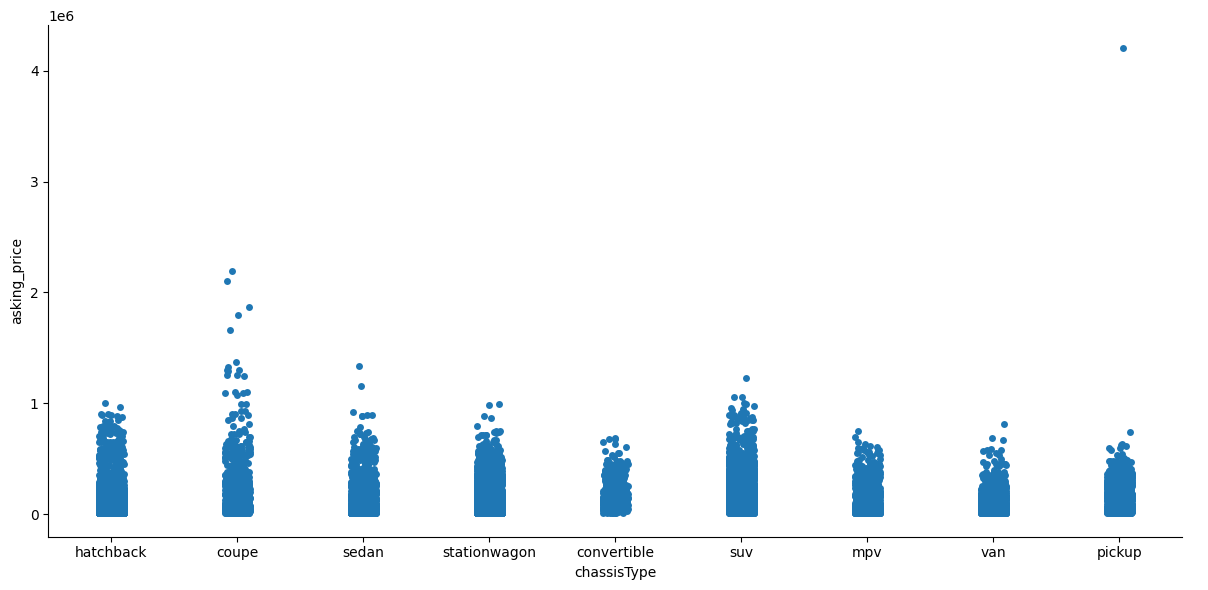

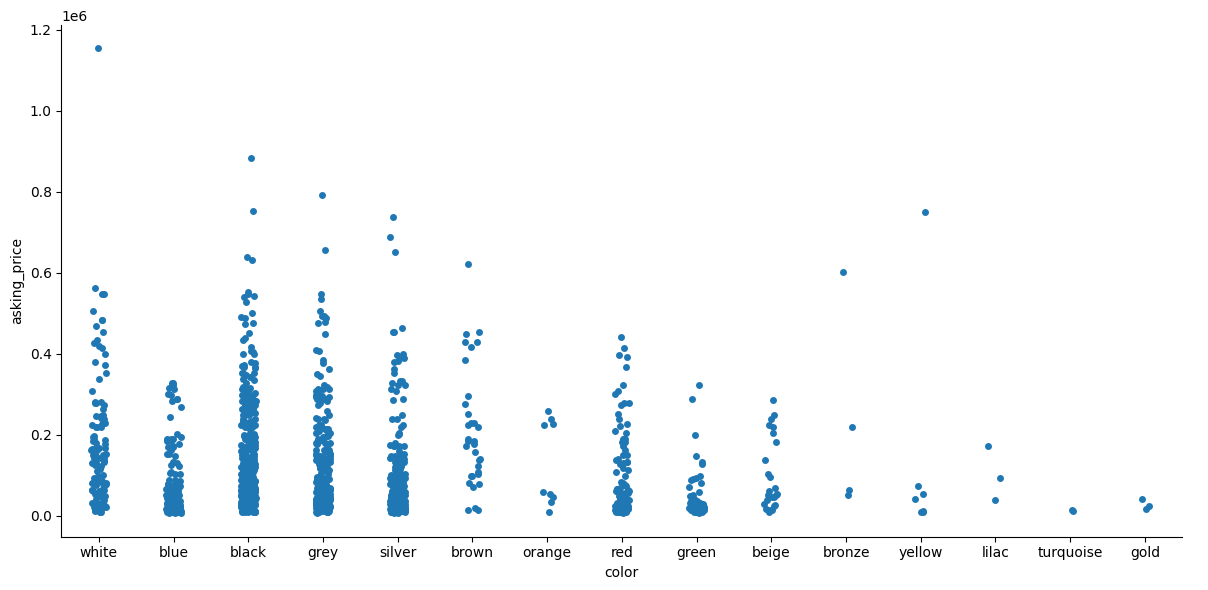

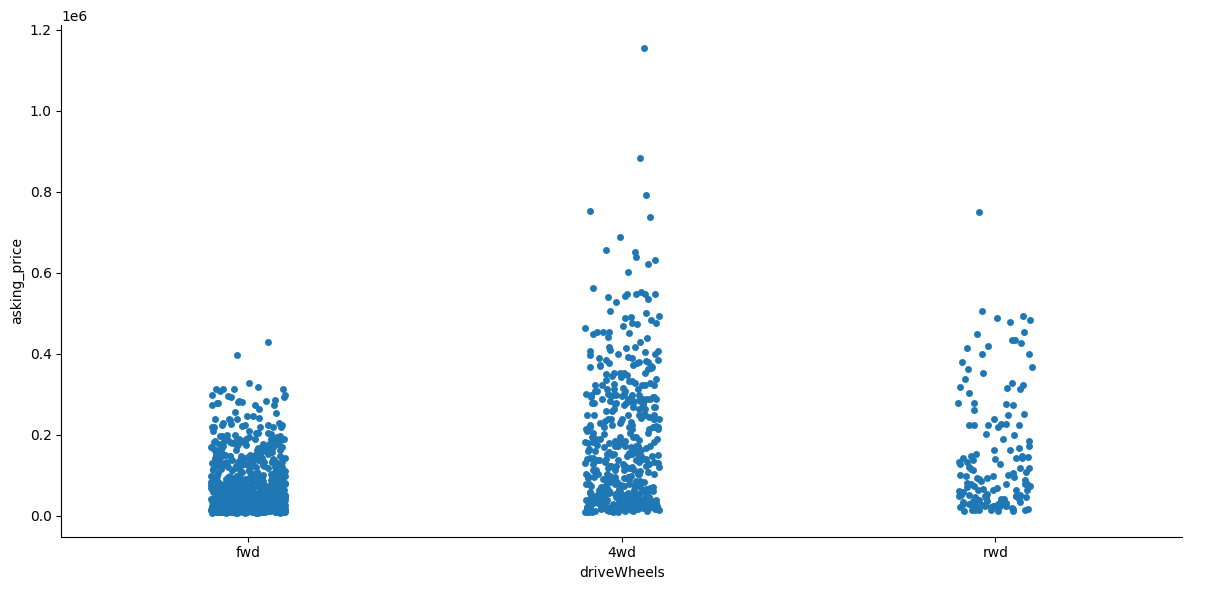

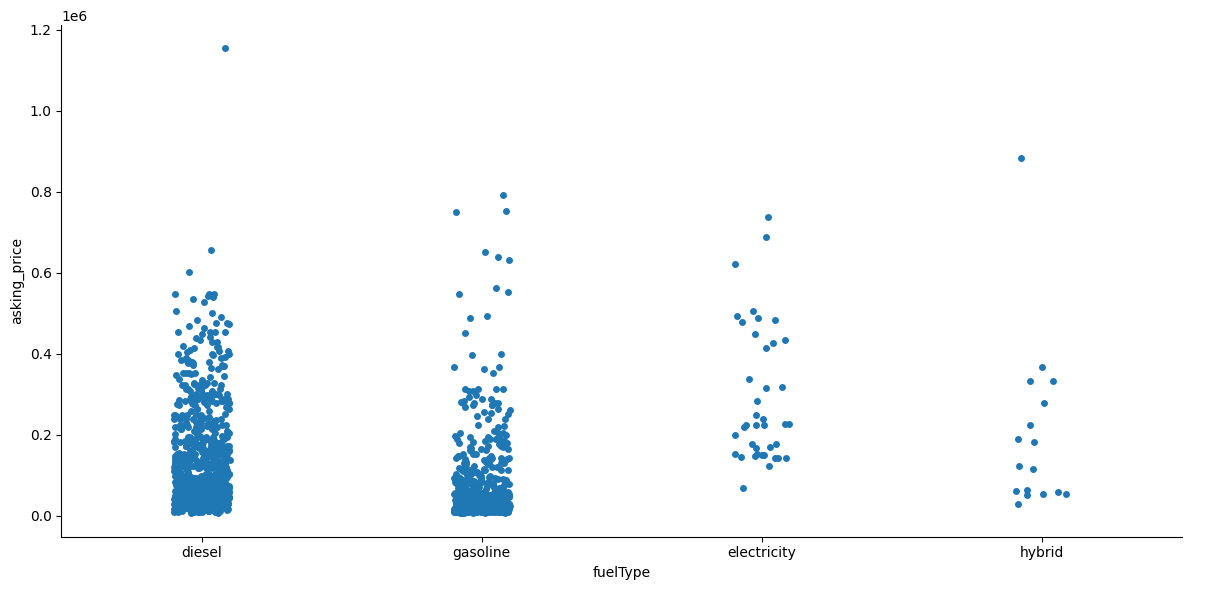

In [58]:

sns.catplot(data=train, x="chassisType", y="asking_price", height=6, aspect=2)
sns.catplot(data=test, x="color", y="asking_price", height=6, aspect=2)
sns.catplot(data=test, x="driveWheels", y="asking_price", height=6, aspect=2)
sns.catplot(data=test, x="fuelType", y="asking_price", height=6, aspect=2)


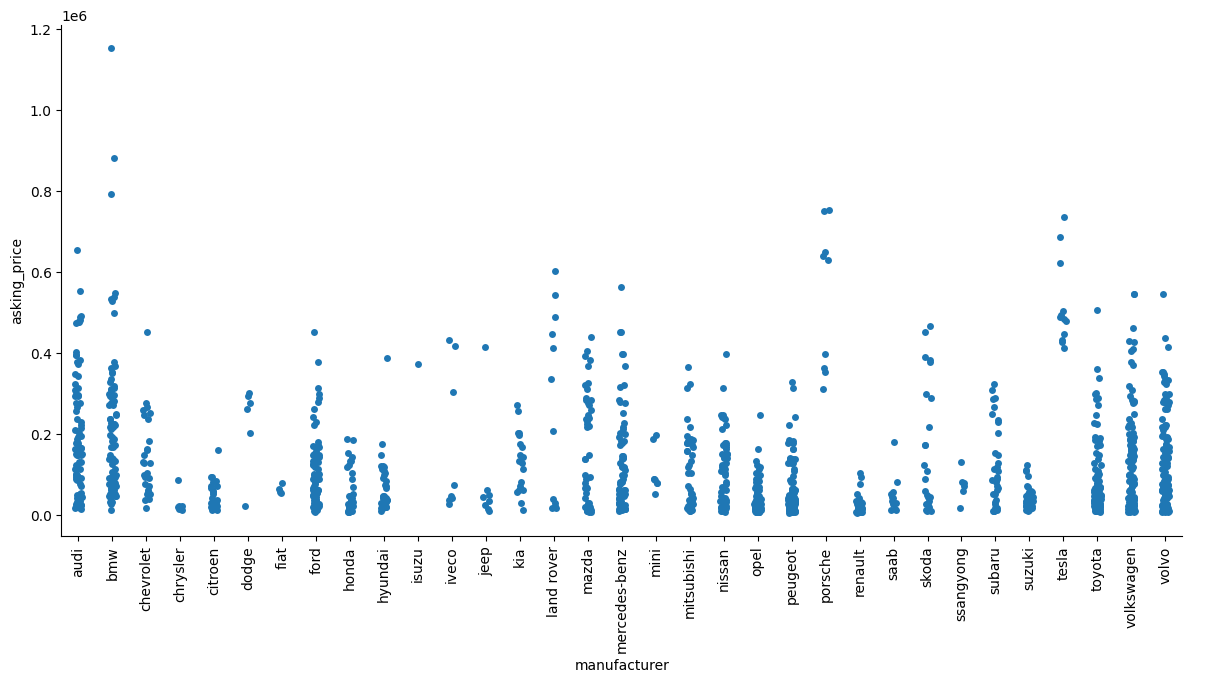

In [57]:
g = sns.catplot(
    data=test, 
    x="manufacturer", 
    y="asking_price", 
    height=6, 
    aspect=2 
)

g.set_xticklabels(rotation=90)


## Conclusions before modelling

1. Experiment with and without outliers
2. In the simple model, only use categorical variables (one hot encoded with low cardinality and drivesWheel and FuelType)
3. Some work would be done clustering manufacturer and models into value groups, but out of scope for this case study
4. More feature engineering would probably yield better results